# Расчёт полей тороидально намагниченного цилиндра в опыте Дейны         (опыт Николаева номер 31)

Вводим цилиндрическую систему координат, в которой (вслед за Таммом) индексом $j$ обозначаем координаты молекулярных токов намагниченного цилиндра, а индексом $a$ обозначаем координаты точек наблюдения

In [1]:
zj = var("zj")
za = var("za")
rj = var("rj")
ra = var("ra")
phi = var("phi")

assume(rj>0)
assume(ra>0)

Для выражения векторного потенциала, создаваемого молекулярными токами намагниченного цилиндра нам потребуется интеграл $\frac{1}{R}$ - обратного расстояния между точкой истока и точкой наблюдения в цилиндрической системе координат, проинтегрированный по координатному углу phi точек истока от нуля до $2\pi$

In [2]:
rja2 = (rj-ra)^2+(zj-za)^2
module = - 4*rj*ra / rja2
IRphi=4*elliptic_kc(module) / sqrt(rja2)
print ("IRphi =", IRphi)

IRphi = 4*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/sqrt((ra - rj)^2 + (za - zj)^2)


Следуя Тамму, обозначаем вектор намагниченности цилиндра через $I$. 
В данном расчёте предположим, что цилиндр имеет только $\varphi$-тую компоненту намагниченности и величина этой намагниченности постоянна в объёме ($I_{\varphi} = const$).

Для поверхностного тока у Тамма можно почерпнуть формулу $js = c \cdot [I \times n]$ (параграф 61. Векторный потенциал магнитного поля при наличии магнентиков. Средняя плотность объёмных и поверхностных токов. Уравнение 61.10 - случай для вакуума)
Для объёмного тока - формулу $jv = c \cdot rot(I)$ (там же, уравнение 61.9)

В работе http://liquidcrystalosmos.narod.ru/deyna_cylinders_nikolaevs_experiment_31.htm было показано, что при равномерной тороидальной намагниченности цилиндра средняя плотность объёмных токов в данной конфигурации имеет только лишь $z$ компоненту, которая по модулю обратно пропорциональна радиус координате цилиндрической системы.

К этому же выводу можно прийти взяв ротор от $I$ при условии $I_{\varphi} = const$ в цилиндрических координатах

In [3]:
cI0 = var("cI0")# произведение намагниченности на скорость света
js = cI0        # плотность поверхностного тока на внутренней и внешней цилиндрической поверхностях цилиндра
jt = cI0        # плотность поверхностного тока на торцах цилиндра
jv = cI0 / rj   # плотность объёмного тока

пределы интегрирования по координатам молекулярных токов

In [4]:
zj1 = var("zj1") # левый торец цилиндра
zj2 = var("zj2") # правый торец цилиндра

rj1 = var("rj1") # радиус внутренней поверхности (сверления) цилиндра
rj2 = var("rj2") # радиус внешней цилиндрической поверхности цилиндра

вспомогательные переменные для интегрирования источников векторного потенциала по поверхностным и объёмным токам

In [5]:
IRphi_js_rj=IRphi*js*rj
print ("IRphi_js_rj =", IRphi_js_rj)

IRphi_jv_rj=IRphi*jv*rj
print ("IRphi_jv_rj =", IRphi_jv_rj)

IRphi_js_rj = 4*cI0*rj*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/sqrt((ra - rj)^2 + (za - zj)^2)
IRphi_jv_rj = 4*cI0*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/sqrt((ra - rj)^2 + (za - zj)^2)


Рассчитаем производную векторного потенциала, создаваемого торцевым поверхностным током, по $z$ координате точки наблюдения

In [6]:
IRphi_js_rj_diff_za_ = lambda c_I0, r_j, r_a, z_j, z_a : (IRphi_js_rj.diff(za)).substitute(ra==r_a).substitute(za==z_a).substitute(zj==z_j).substitute(rj==r_j).substitute(cI0==c_I0)
print ("IRphi_js_rj_diff_za = lambda cI0, rj, ra, zj, za : ", IRphi_js_rj_diff_za_(cI0, rj, ra, zj, za))


IRphi_js_rj_diff_za = lambda cI0, rj, ra, zj, za :  -4*cI0*rj*(za - zj)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/((ra - rj)^2 + (za - zj)^2)^(3/2) + 4*((4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)))*cI0*rj*(za - zj)/(((ra - rj)^2 + (za - zj)^2)^(3/2)*(4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1))


Итак, производная векторного потенциала, создаваемого торцевым поверхностным током, заключённом в плоском кольце толщиной $dr_j$ с радиусом $r_j$, по $z$ координате точки наблюдения

In [7]:
IRphi_js_rj_diff_za = lambda cI0, rj, ra, zj, za :  -4*cI0*rj*(za - zj)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/((ra - rj)^2 + (za - zj)^2)^(3/2) + 4*((4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)))*cI0*rj*(za - zj)/(((ra - rj)^2 + (za - zj)^2)^(3/2)*(4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1))

Учитывая положительное направление поверхностного тока в левом торце и отрицательное направление поверхностного тока в правом торце составим сумму полученной производной для обоих торцов

In [8]:
At_diff_za_ = lambda cI0, rj, ra, zj1, zj2, za : IRphi_js_rj_diff_za_(cI0, rj, ra, zj1, za) - IRphi_js_rj_diff_za_(cI0, rj, ra, zj2, za)
print ("At_diff_za = lambda cI0, rj, ra, zj1, zj2, za : ", At_diff_za_(cI0, rj, ra, zj1, zj2, za))

At_diff_za = lambda cI0, rj, ra, zj1, zj2, za :  -4*cI0*rj*(za - zj1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2))/((ra - rj)^2 + (za - zj1)^2)^(3/2) + 4*cI0*rj*(za - zj2)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj2)^2))/((ra - rj)^2 + (za - zj2)^2)^(3/2) + 4*((4*ra*rj/((ra - rj)^2 + (za - zj1)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2)))*cI0*rj*(za - zj1)/(((ra - rj)^2 + (za - zj1)^2)^(3/2)*(4*ra*rj/((ra - rj)^2 + (za - zj1)^2) + 1)) - 4*((4*ra*rj/((ra - rj)^2 + (za - zj2)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj2)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj2)^2)))*cI0*rj*(za - zj2)/(((ra - rj)^2 + (za - zj2)^2)^(3/2)*(4*ra*rj/((ra - rj)^2 + (za - zj2)^2) + 1))


Итак, производная векторного потенциала, создаваемого торцевым поверхностным током обоих торцов, заключённом в двух плоских кольцах толщиной $dr_{j}$ и радиуса $r_{j}$, по $z$ координате точки наблюдения

In [9]:
At_diff_za = lambda cI0, rj, ra, zj1, zj2, za :  -4*cI0*rj*(za - zj1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2))/((ra - rj)^2 + (za - zj1)^2)^(3/2) + 4*cI0*rj*(za - zj2)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj2)^2))/((ra - rj)^2 + (za - zj2)^2)^(3/2) + 4*((4*ra*rj/((ra - rj)^2 + (za - zj1)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj1)^2)))*cI0*rj*(za - zj1)/(((ra - rj)^2 + (za - zj1)^2)^(3/2)*(4*ra*rj/((ra - rj)^2 + (za - zj1)^2) + 1)) - 4*((4*ra*rj/((ra - rj)^2 + (za - zj2)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj2)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj2)^2)))*cI0*rj*(za - zj2)/(((ra - rj)^2 + (za - zj2)^2)^(3/2)*(4*ra*rj/((ra - rj)^2 + (za - zj2)^2) + 1))

Рассчитаем производную векторного потенциала, создаваемого поверхностным током цилиндрической поверхности, по $r$ координате точки наблюдения

In [10]:
IRphi_js_rj_diff_ra_ = lambda c_I0, r_j, r_a, z_j, z_a : (IRphi_js_rj.diff(ra)).substitute(ra==r_a).substitute(za==z_a).substitute(zj==z_j).substitute(rj==r_j).substitute(cI0==c_I0)
print ("IRphi_js_rj_diff_ra = lambda cI0, rj, ra, zj, za : ", IRphi_js_rj_diff_ra_(cI0, rj, ra, zj, za))

IRphi_js_rj_diff_ra = lambda cI0, rj, ra, zj, za :  -4*cI0*(ra - rj)*rj*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/((ra - rj)^2 + (za - zj)^2)^(3/2) + 2*sqrt((ra - rj)^2 + (za - zj)^2)*((4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)))*cI0*(2*(ra - rj)*ra*rj/((ra - rj)^2 + (za - zj)^2)^2 - rj/((ra - rj)^2 + (za - zj)^2))/(ra*(4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1))


Итак, производная векторного потенциала, создаваемого торцевым поверхностным током цилиндрической поверхности радиуса $r_{j}$, заключённой в поверхностном кольце шириной $dz_{j}$ c координатой $z_{j}$, по $r$ координате точки наблюдения

In [11]:
IRphi_js_rj_diff_ra = lambda cI0, rj, ra, zj, za :  -4*cI0*(ra - rj)*rj*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/((ra - rj)^2 + (za - zj)^2)^(3/2) + 2*sqrt((ra - rj)^2 + (za - zj)^2)*((4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)))*cI0*(2*(ra - rj)*ra*rj/((ra - rj)^2 + (za - zj)^2)^2 - rj/((ra - rj)^2 + (za - zj)^2))/(ra*(4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1))

Учитывая отрицательное направление поверхностного тока на внутренней цилиндрической поверхности (в сверлении) и положительное направление поверхностного тока на внешней цилиндрической поверхности составим сумму полученной производной для обоих цилиндрических поверхностей

In [12]:
As_diff_ra_ = lambda cI0, rj1, rj2, ra, zj, za : - IRphi_js_rj_diff_ra_(cI0, rj1, ra, zj, za) + IRphi_js_rj_diff_ra_(cI0, rj2, ra, zj, za)
print ("As_diff_ra = lambda cI0, rj1, rj2, ra, zj, za : ", As_diff_ra_(cI0, rj1, rj2, ra, zj, za))

As_diff_ra = lambda cI0, rj1, rj2, ra, zj, za :  4*cI0*(ra - rj1)*rj1*elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2))/((ra - rj1)^2 + (za - zj)^2)^(3/2) - 4*cI0*(ra - rj2)*rj2*elliptic_kc(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2))/((ra - rj2)^2 + (za - zj)^2)^(3/2) - 2*sqrt((ra - rj1)^2 + (za - zj)^2)*((4*ra*rj1/((ra - rj1)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)))*cI0*(2*(ra - rj1)*ra*rj1/((ra - rj1)^2 + (za - zj)^2)^2 - rj1/((ra - rj1)^2 + (za - zj)^2))/(ra*(4*ra*rj1/((ra - rj1)^2 + (za - zj)^2) + 1)) + 2*sqrt((ra - rj2)^2 + (za - zj)^2)*((4*ra*rj2/((ra - rj2)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2)))*cI0*(2*(ra - rj2)*ra*rj2/((ra - rj2)^2 + (za - zj)^2)^2 - rj2/((ra - rj2)^2 + (za - zj)^2))/(ra*(4*ra*rj2/((ra - rj2)^2 + (za - zj)^2) + 1))


Итак, производная векторного потенциала, создаваемого поверхностными токами обоих цилиндрических поверхностей, заключённом в двух поверхностных кольцах шириной $dz_{j}$ c координатой $z_{j}$, по $r$ координате точки наблюдения

In [13]:
As_diff_ra = lambda cI0, rj1, rj2, ra, zj, za :  4*cI0*(ra - rj1)*rj1*elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2))/((ra - rj1)^2 + (za - zj)^2)^(3/2) - 4*cI0*(ra - rj2)*rj2*elliptic_kc(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2))/((ra - rj2)^2 + (za - zj)^2)^(3/2) - 2*sqrt((ra - rj1)^2 + (za - zj)^2)*((4*ra*rj1/((ra - rj1)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)))*cI0*(2*(ra - rj1)*ra*rj1/((ra - rj1)^2 + (za - zj)^2)^2 - rj1/((ra - rj1)^2 + (za - zj)^2))/(ra*(4*ra*rj1/((ra - rj1)^2 + (za - zj)^2) + 1)) + 2*sqrt((ra - rj2)^2 + (za - zj)^2)*((4*ra*rj2/((ra - rj2)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2)))*cI0*(2*(ra - rj2)*ra*rj2/((ra - rj2)^2 + (za - zj)^2)^2 - rj2/((ra - rj2)^2 + (za - zj)^2))/(ra*(4*ra*rj2/((ra - rj2)^2 + (za - zj)^2) + 1))

Теперь необходимо составить производную векторного потенциала, создаваемого объёмным током поверхности, по $r$ координате точки наблюдения

In [14]:
IRphi_jv_rj_diff_ra_ = lambda c_I0, r_j, r_a, z_j, z_a : (IRphi_jv_rj.diff(ra)).substitute(ra==r_a).substitute(za==z_a).substitute(zj==z_j).substitute(rj==r_j).substitute(cI0==c_I0)
print ("IRphi_jv_rj_diff_ra = lambda cI0, rj, ra, zj, za : ", IRphi_jv_rj_diff_ra_(cI0, rj, ra, zj, za))

IRphi_jv_rj_diff_ra = lambda cI0, rj, ra, zj, za :  -4*cI0*(ra - rj)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/((ra - rj)^2 + (za - zj)^2)^(3/2) + 2*sqrt((ra - rj)^2 + (za - zj)^2)*((4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)))*cI0*(2*(ra - rj)*ra*rj/((ra - rj)^2 + (za - zj)^2)^2 - rj/((ra - rj)^2 + (za - zj)^2))/(ra*(4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*rj)


Итак, производная векторного потенциала, создаваемого объёмным током, заключённом в объёмном кольце шириной $dz_{j}$ c координатой $z_{j}$ и толщиной $dr_{j}$ и радиуса $r_j$, по $r$ координате точки наблюдения

In [15]:
IRphi_jv_rj_diff_ra = lambda cI0, rj, ra, zj, za :  -4*cI0*(ra - rj)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/((ra - rj)^2 + (za - zj)^2)^(3/2) + 2*sqrt((ra - rj)^2 + (za - zj)^2)*((4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)))*cI0*(2*(ra - rj)*ra*rj/((ra - rj)^2 + (za - zj)^2)^2 - rj/((ra - rj)^2 + (za - zj)^2))/(ra*(4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*rj)


Далее нам необходимо определить собственную функцию для численного интегрирования

In [16]:
def get_integrand_view(f):
    return f(x)

class my_dummy_integral:
    f = None
    a = None
    b = None
    def __init__(self, f, a, b):
        print ("my_dummy_integral ", f, a, b)
        self.f = f
        self.a = a
        self.b = b

def my_numerical_integral(f, a, b):
    from scipy import integrate

    to_call_integration = True

    if type(f) is my_dummy_integral:
        to_call_integration = False

    import inspect
    stack = inspect.stack()
    for frame in stack:
        func_name = frame[3]
        # print ("func_name = ", func_name)
        if ('get_integrand_view' == func_name):
            to_call_integration = False
            break;

    if not to_call_integration:
        return my_dummy_integral(f,a,b)

    try:
        integral = integrate.quad(f, a, b)

        result = integral[0]
        return result

    except Exception as ex:

        print ("Exception ex = ", str(ex))
        print ("f = ", f)
        try:
            print ("integrand = ", get_integrand_view(f))
        except Exception as ex2:
            print ("Exception ex2 = ", ex2)
        print ("a = ", a)
        print ("b = ", b)

        raise ex

        integral = numerical_integral(f, a, b)

        print ("integral = ", integral)

        result = integral[0]
        print ("result = ", result)
        return result


Теперь необходимо производную векторного потенциала, создаваемого объёмным током, заключённом в объёмном кольце шириной $dz_j$ c координатой $z_j$ и толщиной $dr_j$ и радиуса $r_j$, по $r$ координате точки наблюдения - проинтегрировать по радиусу точек истока от $r_{j1}$ до $r_{j2}$

In [17]:
Av_diff_ra = lambda cI0, rj1, rj2, ra, zj, za : my_numerical_integral(lambda rj : IRphi_jv_rj_diff_ra(cI0, rj, ra, zj, za), rj1, rj2)

Задаём размеры цилиндров в сантиметрах

In [18]:
# sizes of cylinders in Deyna's video
Zj1 = -1.5
Zj2 =  1.5
Rj1 = 0.3
Rj2 = 1.5

Ra1 = Rj1
Ra2 = Rj2

DZ = Zj2 - Zj1

Производим подстановку размеров координат правого цилиндра - источника векторного потенциала в формулы производных векторного потенциала

In [19]:
At_diff_za_substituted_zj = lambda rj, ra, za : At_diff_za(1, rj, ra, Zj1, Zj2, za)

In [20]:
As_diff_ra_substituted_rj = lambda ra, zj, za : As_diff_ra(1, Rj1, Rj2, ra, zj, za)

In [21]:
Av_diff_ra_substituted_rj = lambda ra, zj, za : Av_diff_ra (1, Rj1, Rj2, ra, zj, za)

Определяем функцию расчёта векторного магнитного поля H (компонента phi)

In [22]:
def calc_H_phi( At_diff_za_substituted_zj, As_diff_ra_substituted_rj, Za, Ra):
    At_diff_za_substituted_zj_za_ra = lambda rj : At_diff_za_substituted_zj(rj, Ra, Za)
    As_diff_ra_substituted_rj_za_ra = lambda zj : As_diff_ra_substituted_rj(Ra, zj, Za)

    At_diff_za_num_int = At_diff_za_substituted_zj_za_ra(rj).nintegral(rj, Rj1, Rj2)
    As_diff_ra_num_int = As_diff_ra_substituted_rj_za_ra(zj).nintegral(zj, Zj1, Zj2)
    Av_diff_ra_num_int = my_numerical_integral( lambda zj : Av_diff_ra_substituted_rj(Ra, zj, Za), Zj1, Zj2)
    As_v_diff_ra_num_int = As_diff_ra_num_int[0] - Av_diff_ra_num_int

    H_phi_t = At_diff_za_num_int[0]
    H_phi_s = - As_v_diff_ra_num_int

    H_phi = H_phi_t + H_phi_s
    print ("Ra =", Ra, "Za =", Za, "H_phi_t =", H_phi_t)
    print ("Ra =", Ra, "Za =", Za, "H_phi_s =", H_phi_s)
    print ("Ra =", Ra, "Za =", Za, "H_phi   =", H_phi)

    return (H_phi, H_phi_t, H_phi_s)

Определяем функцию расчёта поперечной силы Лоренца (компонента $z$), действующей на торец другого цилиндра с координатой $Z_a$

In [23]:
def calc_F_lorenz( At_diff_za_substituted_zj, As_diff_ra_substituted_rj, Za, Ra1, Ra2):
    At_diff_za_substituted_zj_za = lambda rj, ra : At_diff_za_substituted_zj(rj, ra, Za)
    As_diff_ra_substituted_rj_za = lambda ra, zj : As_diff_ra_substituted_rj(ra, zj, Za)
    Av_diff_ra_substituted_rj_za = lambda ra, zj : Av_diff_ra_substituted_rj(ra, zj, Za)
    
    jt_substituted_cI0 = jt.substitute(cI0 == 1)

    At_diff_za_num_int_ra = lambda Rj : my_numerical_integral(lambda ra : (2*pi*jt_substituted_cI0*ra*At_diff_za_substituted_zj_za(Rj, ra)), Ra1, Ra2)
    At_diff_za_num_int_ra_int_rj = my_numerical_integral(lambda rj : At_diff_za_num_int_ra(rj), Rj1, Rj2)
    
    As_diff_ra_num_int_ra = lambda Zj : my_numerical_integral(lambda ra : (2*pi*jt_substituted_cI0*ra*(As_diff_ra_substituted_rj_za(ra, Zj) ) ), Ra1, Ra2)
    As_diff_ra_num_int_ra_int_zj = my_numerical_integral(lambda zj : As_diff_ra_num_int_ra(zj), Zj1, Zj2)
    
    Av_diff_ra_num_int_ra = lambda Zj : my_numerical_integral(lambda ra : (2*pi*jt_substituted_cI0*ra*(Av_diff_ra_substituted_rj_za(ra, Zj) ) ), Ra1, Ra2)
    Av_diff_ra_num_int_ra_int_zj = my_numerical_integral(lambda zj : Av_diff_ra_num_int_ra(zj), Zj1, Zj2)

    F_z_t = At_diff_za_num_int_ra_int_rj
    F_z_s = As_diff_ra_num_int_ra_int_zj
    F_z_v = Av_diff_ra_num_int_ra_int_zj

    As_v_diff_ra_num_int_ra_int_zj = As_diff_ra_num_int_ra_int_zj - Av_diff_ra_num_int_ra_int_zj
    F_z_sv = - As_v_diff_ra_num_int_ra_int_zj
    F_z = F_z_t + F_z_sv

    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z_t  =", F_z_t)
    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z_s  =", F_z_s)
    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z_v  =", F_z_v)
    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z_sv =", F_z_sv)
    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z    =", F_z)

    return (F_z, F_z_t, F_z_s, F_z_v)


Определяем функцию расчёта поперечной Лоренца (компонента $z$), действующей на левый цилиндр исходя из величины зазора $dz$

In [24]:
def calc_F_lorenz_cylinder(dz):
    # расчет силы Лоренца, действующей на ближайжий (правый) торец пробного цилиндра расположенного левее на расстоянии
    Za = Zj1 - dz
    F_lorenz_left_cylinder_right_t = calc_F_lorenz( At_diff_za_substituted_zj, As_diff_ra_substituted_rj, Za, Ra1, Ra2)
    print ("Za = ", Za, "F_lorenz_left_cylinder_right_t = ", F_lorenz_left_cylinder_right_t)

    # расчет силы Лоренца, действующей на удалённый (левый) торец пробного цилиндра расположенного левее на расстоянии
    Za = Zj1 - DZ - dz
    F_lorenz_left_cylinder_left_t = calc_F_lorenz( At_diff_za_substituted_zj, As_diff_ra_substituted_rj, Za, Ra1, Ra2)
    print ("Za = ", Za, "F_lorenz_left_cylinder_left_t =", F_lorenz_left_cylinder_left_t)

    # учитывая отрицательное направление торцевого тока в правом торце и положительное направление торцевого тока в левом торце
    # находим суммарную силу Лоренца действующую на левый цилиндр
    F_lorenz_cylinder = - F_lorenz_left_cylinder_right_t[0] + F_lorenz_left_cylinder_left_t[0]
    print ("dz = ", dz, "F_lorenz_cylinder = ", F_lorenz_cylinder)

    return F_lorenz_cylinder



Запуск расчёта силы Лоренца и величины векторного магнитного поля для заданного набора значений зазора между цилиндрами

In [25]:
plot_data_f_dz = []
plot_data_f_Za = []
plot_data_h = []
plot_data_h_t = []
plot_data_h_s = []

Ra = (Rj1 + Rj2) / 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    h = calc_H_phi( At_diff_za_substituted_zj, As_diff_ra_substituted_rj, Za, Ra)
    f = calc_F_lorenz_cylinder(dz)
    plot_data_h += [(Za, h[0])]
    plot_data_h_t += [(Za, h[1])]
    plot_data_h_s += [(Za, h[2])]
    plot_data_f_dz += [(dz, f)]
    plot_data_f_Za += [(Za, f)]


Ra = 0.900000000000000 Za = -1.51000000000000 H_phi_t = 5.644078024649912
Ra = 0.900000000000000 Za = -1.51000000000000 H_phi_s = -6.112910411879253
Ra = 0.900000000000000 Za = -1.51000000000000 H_phi   = -0.46883238722934095
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -1.51000000000000 F_z_t  = 37.574573607478655
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -1.51000000000000 F_z_s  = 14.883427043888043
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -1.51000000000000 F_z_v  = -25.724906359382704
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -1.51000000000000 F_z_sv = -40.60833340327075
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -1.51000000000000 F_z    = -3.0337597957920934
Za =  -1.51000000000000 F_lorenz_left_cylinder_right_t =  (-3.0337597957920934, 37.574573607478655, 14.883427043888043, -25.724906359382704)
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -4.51000000000000 F_z_t  = 2.6040228344504093
Ra1 = 0.300000000000000 Ra2 = 1.50000000000

Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -4.60000000000000 F_z_t  = 2.4688144249013226
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -4.60000000000000 F_z_s  = -1.1547933842267941
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -4.60000000000000 F_z_v  = -1.567767239274337
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -4.60000000000000 F_z_sv = -0.4129738550475428
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -4.60000000000000 F_z    = 2.05584056985378
Za =  -4.60000000000000 F_lorenz_left_cylinder_left_t = (2.05584056985378, 2.4688144249013226, -1.1547933842267941, -1.567767239274337)
dx =  0.100000000000000 F_lorenz_cylinder =  3.1122624374655405
Ra = 0.900000000000000 Za = -1.70000000000000 H_phi_t = 4.532025131552119
Ra = 0.900000000000000 Za = -1.70000000000000 H_phi_s = -4.412225502750756
Ra = 0.900000000000000 Za = -1.70000000000000 H_phi   = 0.11979962880136341
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -1.70000000000000 F_z_t  = 26.830

Ra = 0.900000000000000 Za = -3.00000000000000 H_phi_t = 1.179315695643001
Ra = 0.900000000000000 Za = -3.00000000000000 H_phi_s = -0.45768724097956026
Ra = 0.900000000000000 Za = -3.00000000000000 H_phi   = 0.7216284546634408
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -3.00000000000000 F_z_t  = 7.36207611516913
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -3.00000000000000 F_z_s  = -2.234935648368841
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -3.00000000000000 F_z_v  = -5.176717938808026
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -3.00000000000000 F_z_sv = -2.941782290439185
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -3.00000000000000 F_z    = 4.420293824729946
Za =  -3.00000000000000 F_lorenz_left_cylinder_right_t =  (4.420293824729946, 7.36207611516913, -2.234935648368841, -5.176717938808026)
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -6.00000000000000 F_z_t  = 1.1819339645567772
Ra1 = 0.300000000000000 Ra2 = 1.50000000000000 Za = -

Результирующий график силы Лоренца приложенной к левому цилиндру в зависимости от зазора

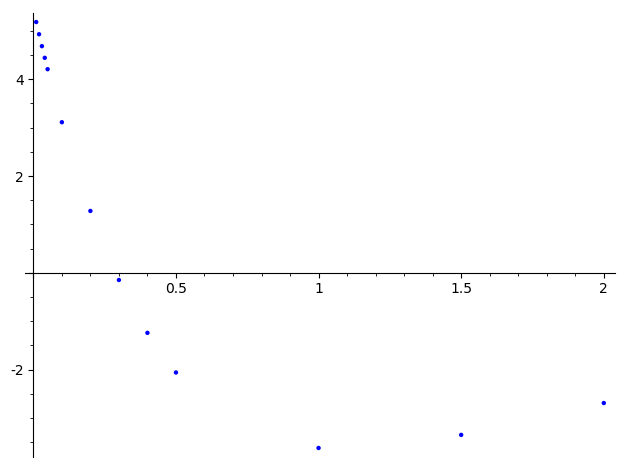

In [26]:
list_plot(plot_data_f_dz).show()

Результирующий график силы Лоренца приложенной к левому цилиндру в зависимости от координаты правого торца левого цилиндра

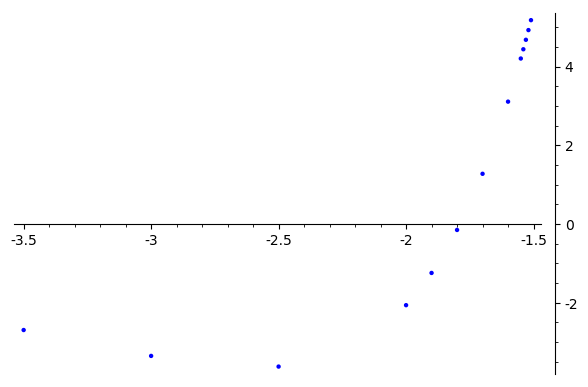

In [27]:
list_plot(plot_data_f_Za).show()

Результирующий график векторного магнитного поля $H$ (компонента $\varphi$) в зависимости от координаты точки наблюдения $Z_a$

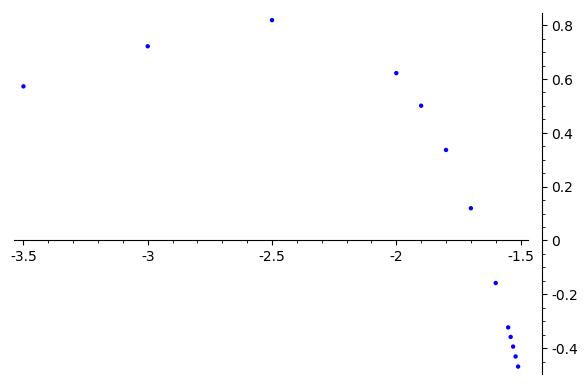

In [28]:
list_plot(plot_data_h).show()

Результат расчёта силы Лоренца взаимодействия тороидально намагниченных цилиндров в опыте Дейны (опыт Николаева номер 31)

Результаты расчёта силы притяжения между тороидально намагниченными цилиндрами (поперечная сила Ампера-Лоренца) в зависимости от зазора в сантиметрах. Размеры цилиндров: диаметр 30 мм, длина 30 мм, диаметр внутреннего сверления 6 мм. На графике зазор в сантиметрах. Сила в относительных единицах.

In [29]:
F_lorenz_cylinder = \
[(0.01, 5.183770705060512), \
 (0.02, 4.931139456899709), \
 (0.03, 4.6844790094805), \
 (0.04, 4.4436128151947445), \
 (0.05, 4.208385717713281), \
 (0.10, 3.1122624374655405), \
 (0.20, 1.2781966083689669), \
 (0.30, -0.14941233639209917), \
 (0.40, -1.242198021974193), \
 (0.50, -2.061485390558925), \
 (1.00, -3.62225931482677), \
 (1.50, -3.351445756001013), \
 (2.00, -2.693193839759329)]

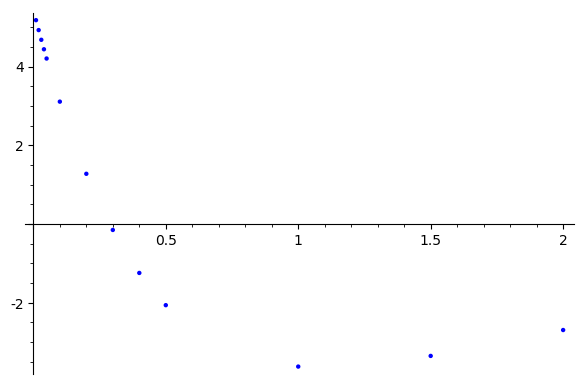

In [30]:
list_plot(F_lorenz_cylinder).show()

Таким образом в данной работе показано, что для доказательства существования продольной силы совершенно недостаточно установления факта притяжения цилиндров при зазоре между их торцами менее 3 мм. Поэтому для дальнейших исследований необходима следующая постановка эксперимента. Установить зазор между цилиндрами более 3 мм. И показать направление силы их взаимодействия: притягивание или отталкивание.